# Data Loading and Basic Preprocessing

As mentioned, in the introduction, problem definition and data collection are critical aspects of data science. However, they are difficult to discuss in a generic way, and go beyond the scope of this book. Instead, we will assume you defined the problem, ensured it ammendable to a machine learning solution, and collected relevant data.

One of the most common exchange formats for data is comma separated value (CSV) files, which, for better or worse, have become ubiquous. CSV files (or sometimes TSV files for tab separated values) do not follow a precise standard, and generally are lacking important information, such as meta-data about the types of columns or what they represent. However, they can be read on any system, by any spreadsheet application, or even with a simple text editor.
Another common situation is reading from a database, which might contain more meta-information, for relational databases like SQL, or might have even less structure than a CSV file in the case of non-relational databases (aka no-SQL databases).
In general, you can read your data in any way you like, as long as you can wrangle it into a tabular format within Python.


```{margin} The iris dataset
I was tempted to use the iris dataset, a famous machine learning dataset collected in .. by the father of statistics, Fisher.
Many of the lessons we'll learn below about the breast cancer dataset are also true for the iris dataset, but I didn't want to pick too easy a target.

```

We will be looking at two binary classification datasets, the 'breast cancer' dataset which is included in scikit-learn and was published 1993, and a subset of the lending club dataset, a popular peer-loan community.
It is instructive to compare these two datasets and their characteristics, in particular since the breast cancer dataset is commonly used for educational purposes.

## Loading the 'breast cancer' dataset

First, let me give you a bit of background on the two datasets. The 'breast cancer' dataset contains measurements of breast tissue, obtained by a medical imaging technique. From that, several measurements of the cell nuclei are derived.
The goal is to determine whether a tumor is benign (harmless) or melignant (that is dangerous, in other words cancer). As the data comes with scikit-learn, we can load it directly from the library by importing the ``load_beast_cancer`` function:

In [1]:
from sklearn.datasets import load_breast_cancer
# specifying "as_frame=True" returns the data as a dataframe in addition to a numpy array
cancer = load_breast_cancer(as_frame=True)

```{margin}
If you want more information about the dataset, you can show it by running ``print(cancer.DESCR)`` or by visiting the [documentation](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset).
For brevity, we will not reproduce the description here.
```

Most of the datasets that come with scikit-learn are bundled in so-called 'bunch' objects which contain various information about the dataset. As we specified ``as_frame=True``, the bunch that is returned by ``load_breast_cancer`` will in particular contain a dataframe object, which is what we will be working with:

In [2]:
cancer_df = cancer.frame
cancer_df.shape

(569, 31)

As you can see, the dataset contains 569 rows or samples, and 31 columns. Let's have a closer look at it:

In [3]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


We can see that the first 30 columns are the measurments or features, while the last column is the target.
We can also see that all the features are floating point numbers of various scales, and the target is encoded as an integer.
A dataset of 569 samples is quite small, and while 30 features are potentially hard to visualize, the amount is not overwhelming.

One of the most important pieces of information in a classification task is the prevalence of the classes, which we can easily compute with pandas' ``value_count`` method. We can get the absolute counts by just calling the method, or the frequencies by passing ``normalize=True``:

In [4]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [5]:
cancer_df.target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

We can see that about 63% of samples belong to class 1, which are the benign samples. It's a good idea to visualize your data before you start to do any learning. We won't go into the details of data visualization, but some aspects that are often useful to investigate are the distribution of individual features, and how they relate to the target variable. There's many ways to visualize distributions, but given that we have 30 features, doing a scatter plot or histogram for all of them might be overly complicated.
Instead, we start with a simple box plot. For some of the plotting and for the later processing it will be convenient to have a dataframe containing only the features, not the target. The easiest way to achieve that is to create a new dataframe with the target dropped:

In [6]:
cancer_features = cancer_df.drop(columns='target')
cancer_features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## Basic exploratory data analysis (EDA) of the 'breast cancer dataset'

The 'cancer_features' dataframe now contains only the features, not the target. By default, the ``drop`` method is not an in-place operation, so the original ``cancer_df`` dataframe still has all the columns.
Now let's do a simple box plot:

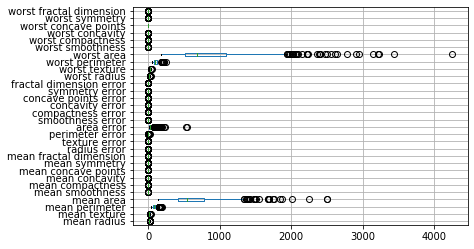

In [7]:
# using vert=False makes the box plot horizontal, which makes it easier to read the column names without tilting your head.
cancer_features.boxplot(vert=False)
# using seaborn this would be
# sns.boxplot(data=cancer_features, orient='h')

From the plot we can see that the features have very different orders of magnitude, with the area related features much larger than all the other features. It's hard to see the distribution of the smaller features, but the area features seems to have a skewed distribution with a tail to the right.

```{margin}
There are more elegant ways to create this plots using seaborn, feel free to give it a go using facetgrid.
I think it's a good idea to know the more general patterns as well, though.
```

A way to visualize how the features relate to the target is by looking at box-plots for each feature when grouping the data by the target.
If the distributions for the two target classes are different for a given feature, this feature is likely to be informative for the classification task.
There's many ways to create such a plot, here is a relatively manual one, using a flexible pattern that I use quite frequently.
I fist create a grid of plots using ``plt.subplots`` and then iterate over the features and create one plot per feature.

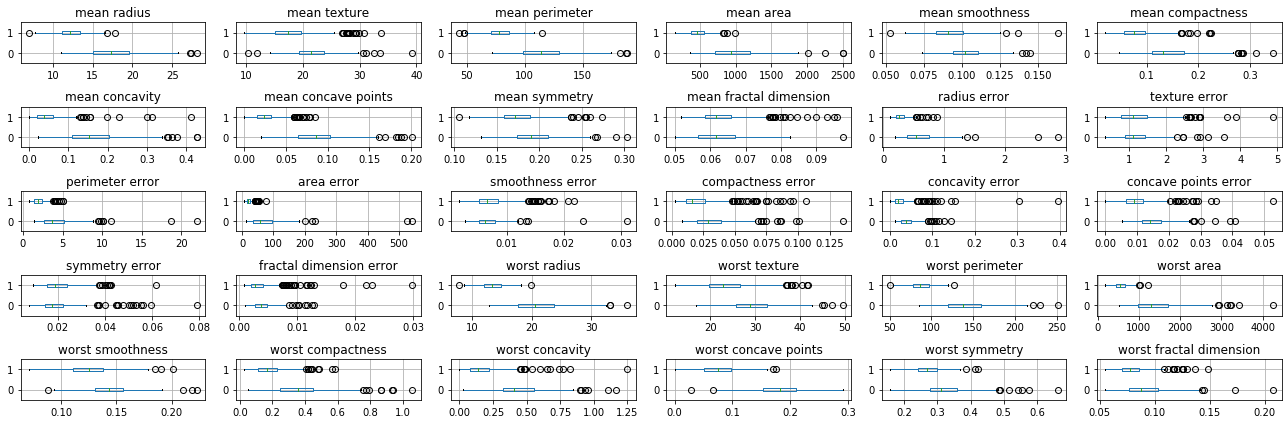

In [11]:
import matplotlib.pyplot as plt
# create a grid of plots, with 5 rows and 6 columns
# and place it on a canvas 18 (virtual) inches whide and 6 inches high
fig, axes = plt.subplots(5, 6, figsize=(18, 6))
# for each column (and with one axis after another)
for c, ax in zip(cancer_features.columns, axes.ravel()):
    # create a box-plot grouped by the target variabel
    cancer_df[[c, 'target']].boxplot(vert=False, by='target', ax=ax)
    # remove the x-axis label
    ax.set_xlabel("")
# remove the figure title
plt.suptitle("")
# fit everything nicely on the plot
plt.tight_layout()

Here ``zip`` allows us to iterate over columns in the data (i.e. features) together with the axes in the grid of plots. Using ``.ravel`` on the grid of plots flattens the 5x6 numpy array of axes so we can iterate over them as one flat array of 30 elements.
One of the reasons I used this technique is that now each feature has it's own x-axis, and so we can see all the distributions, even though they are on different scales.
While we will see more automatic and rigorous techniques later, even a quick visual inspection can tell us a lot about the data. We can see that many features are higly informative, such as 'mean radius' and 'worst perimiter', while others are less so, such as 'symmetry error' or 'texture error'. For a more detailed view, we might want to do a scatter plot matrix for some of the more informative features. I select 'mean radius', 'mean perimeter', 'mean area' and 'worst concave points' arbitrarily.

TODO FIXME

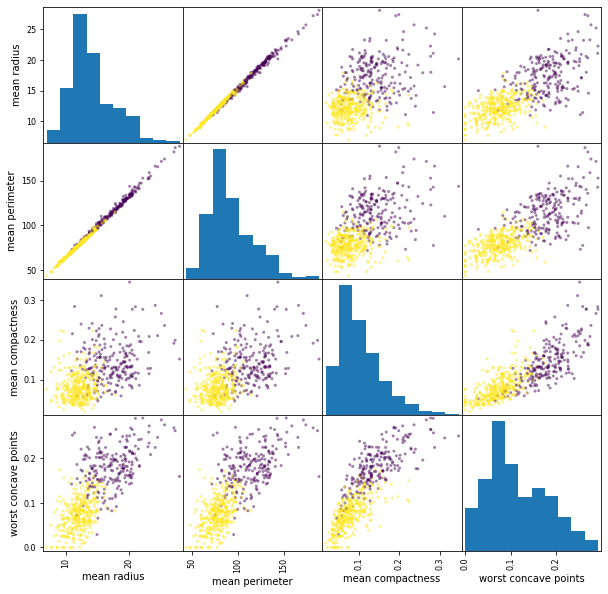

In [43]:
import pandas as pd
# we're using 'c' to set the color of points according to the class.
# unfortunately it's a bit tricky to get a legend using pandas, it would be easier with seaborn.
# and we set figsize to get a square figure.
# increasing the size in inches actually has the effect of decreasing the text size when rendering it in a jupyter notebook.
pd.plotting.scatter_matrix(
    cancer_features[['mean radius', 'mean perimeter', 'mean compactness', 'worst concave points']],
    c=cancer_df.target, figsize=(10, 10));

This scatterplot show many interesting aspects of the data. In particular, we can see that mean radius and mean perimeter are highly correlated (as one might expect if the nuclei are approximately round). There's also a pronounced but smaller correlcation between 'perimieter' and 'worst perimiter'. Finally, and maybe most interesting, combining 'worst concave points' with any of the other features (in particular with worst perimeter) seems to result in separating the classes very well. At this point I would be very optimistic in finding a simple model for this data. There are some outliers that do not follow the overall trend of the data, and these might be worth investigating, depending how how acurate a model is sought.

## Loading the 'lending club' dataset

Next, we will look at the lending club data. This dataset is much larger than the 'breast cancer' dataset. You can download it from TODO and substitute the path to it below.
Here, we're using the pandas ``read_csv`` function, which, as mentioned earlier, is one of the most common ways to getting your data into Python:

In [13]:
loans = pd.read_csv("C:/Users/t3kci/Downloads/loan.csv/loan.csv")

C:\Users\t3kci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
loans.shape

(2260668, 145)

As you can see, the dataset contains over 2.2 million rows, and 145 features. This dataset contains the status of loans made on the lending club peer lending platform. Each row corresponds to a loan, and contains information about the person requesting the loan and data about payments made. This data has not been prepared for a particular machine learning task yet. It's just the data recorded in their system, just like you might find data relevant to your application in your system. Some work has already been done for us in that all the data is contained in a single table.



There are 145 columns, which can be quite overwhelming, but is not atypical. Let's at least list them. You can find a full data dictionary (i.e. an explanation of all column) at TODO.

In [15]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(loans.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_i

The question we want to investigate is how risky a loan is before it is taken. This is quite interesting for those wanting to make a loan on the platform. The platform associates a 'grade' or risk with each loan request, which is recorded in the data and based on a propretary (i.e. secred) risk model. There are several interesting questions we could ask, say, "How acurate it their risk model?", "Can we what determine how their grade is assigned? (i.e. reverse engineer the model)", "Can we built a more acurate model without relying on their grade?" and "Can we build a more accurate model when incorporating their grade?".

Given that this is the core business of the company, we might not be able to beat their algorithm, but these are at least interesting to investigate.

```{margin} Information leakage
Information leakage is a broad concept in machine learning that refers to models 'cheating' in some way to achieve very good results.
Often, a data scientist is not aware that a model is 'cheating' by accessing information it shouldn't, and will assume the model performs well. When the model is put into production, the problem will become (hopefully) immediately apparent, as predictions are much worse than was assumed.
Information leakage can come from causal or temporal issues in data collection, such as in the lending club example. It can also come from improperly splitting data into training and test set, which we will discuss soon.
Roughtly, you can think of two kinds of information leakage: one, as in the lending club example, where the features will be fundamentally different during production than they are during training.
The other is when the training and test set are not independent of each other, and/or the test set is not independent of the model. TODO didn't introduce test set!
```

Keep in mind, though, that the data was not formulated to answer these questions. For example, if we want to predict how risky a loan is, the input features should not consider whether the borrower has been late on payments *for this loan*, as we wouldn't have this information when first evaluating the request.
The data as-is contains numerous instances of what is known as data leakage, where side-information is contained in the data that would not be available to the model in a predictive setting, and which might seem like the model is performing well, when really it is not. Some of these might be subtle differences in how the data is collected. Some versions of this dataset contain the fico score of the borrower, i.e. how credit-worthy they are. This is clearly a sensible and useful feature in include. However, the input that is relevant for building a predictive model of risk is the fico score *at the time the loan was requested*. There is a version of the dataset that also includes the fico score *at the time the data was collected*, which is quite different. If a borrower defaulted on a loan, this will decrease their credit scoe, and so the credit score at the time of data collection, i.e. after they defaulted on the loan, is much more informative., yielding a highly accurate model (on that data).  However, when using a model to predict the risk of a new loan, this model will be much less accurate, as the credit score can not have information about a loan that hasn't happened yet.

TODO make this more clearn
TODO use data with fico score?

Let's have a closer look at the data:

In [16]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Apart from the fact that there are many more columns in this dataset than in the breast cancer dataset, the columns in this data are also much more varied in nature. We can see that some of them are numbers, such as the loan amount ('loan_amnt'), others are letters such as 'grade', strings, such as 'disbursement_method' and many of them are NaN (standing for Not A Number), representing missing data in pandas. There's also date columns, though none of them are visible here as only a subset of the columns is shown by default.

What we are interested in is the outcome of a loan, which is encoded in ``loan_status``. Let's look at the different values and their counts:

In [17]:
loans.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In the dataset, most of the loans are `'Fully Paid'`. Next, we have `'Current'` loans, i.e. those that haven't ended yet. Then, there are `'Charged Off'` meaning it hasn't been paid off and no further payment is expected, and several variants of lateness and special statuses. For a first analysis, we can make our life easier by restricting outcomes to those that are 'Fully Paid', which we'll consider a good outcome, and 'Charge Off' which we'll consider a bad outcome, so these will be the two target classes we consider. Doing so we're discarding a lot of data; however, we will still have over a million loans to learn from. And the biggest part of the data is 'Current' loans for which we don't know the outcome (we could look at late payments etc, but that would make the analysis much more complicated).

So let's restrict ourself to a subset of the data where `'loan_status'` is '`Fully Paid'` or `'Charged Off'`. Here, we're using ``isin`` to create a boolean mask and then index the full dataframe with that mask.
Another option would be to use the ``filter`` method of ``loans`` dataframe instead of indexing.

In [18]:
loans_ended = loans[loans.loan_status.isin(['Fully Paid', 'Charged Off'])]
# let's check that we got what we wanted
loans_ended.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

For now, we'll try to wrestle this dataset so it looks a bit more like the one above, and only use some of the numeric columns.
One very simple way to look at the types of columns is to look at the dtypes, and how often they appear:

In [19]:
loans_ended.dtypes.value_counts()

float64    105
object      36
int64        4
dtype: int64

Here, we can see there's 105 float columns and 4 integer columns, both of which are likely numeric (though the inter columns could also encode categories). There's 36 object columns, which are strings in pandas. Some of these represent dates, but these are only parsed by pandas if we explicitly ask for it.
Looking through the data dictionary, some columns that we could expect to be informative and that do not use post-hoc information are the interest rate and loan amount, the annual income of the borrower, and the total collateral amount. We also include the target 'loan_status' which now only includes two values:

In [20]:
loan_features = loans_ended[['int_rate', 'annual_inc', 'loan_amnt', 'tot_coll_amt', 'loan_status']]

Now let's do a similar box plot as we did above for the breast cancer dataset for these four columns:

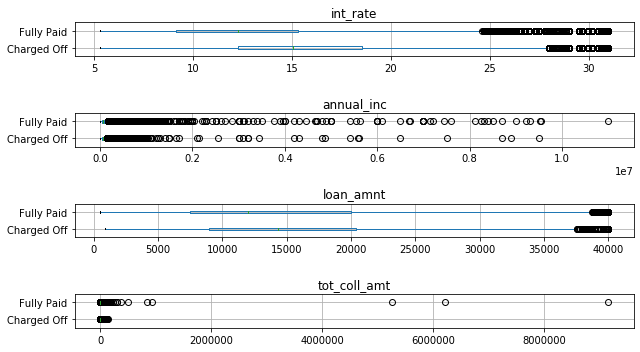

In [21]:
# create a grid of plots, with 5 rows and 6 columns
fig, axes = plt.subplots(4, 1, figsize=(9, 5))
# for each column (and with one axis after another)
for c, ax in zip(loan_features.columns, axes.ravel()):
    # create a box-plot grouped by the target variabel
    loan_features[[c, 'loan_status']].boxplot(vert=False, by='loan_status', ax=ax)
    # remove the x-axis label
    ax.set_xlabel("")
# remove the figure title
plt.suptitle("")
# fit everything nicely on the plot
plt.tight_layout()

There's several interesting observations here: None of the distriibutions overlap as little as for some of the informative features on the breast cancer dataset, so at least based on these four features, this is a more challenging classification task.
Still, interest rate seems to be quite informative, and while the distributions for loan amount overlap, their medians are different.
For anual income and total collateral, it's much harder to see any trends, as the distributions are very skewed. We can see that whenever there was a high collateral amount, the loans were fully paid, but these are only a handful out of a million points.

```{margin} Skewed amounts
It's quite typical for income and prices to be heavily skewed and follow some exponential distribution. You probalby know this from arguments about social inequality: there is a some people that are poor, many people that are average, but then
the top 20% make vastly more than the ones below, and the to 10% make again much more, and so on.
A similar thing is true for prices: think of any product, say shoes. There's cheap shoes, and most shoes are probably betweek $40 and $200, but then, there's expensive shoes and there's basically no limit on how expensive a shoe you can find. However, there's probably very few shoes that are more than $10,000, and even less shoes that are more than $100,000 (but I'm sure you can find some).
```

We could look at a logarithmic scaling at the data, or histograms, but leave that for later. TODO maybe?
Instead, we'll look at the scatter matrix again:

C:\Users\t3kci\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\t3kci\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


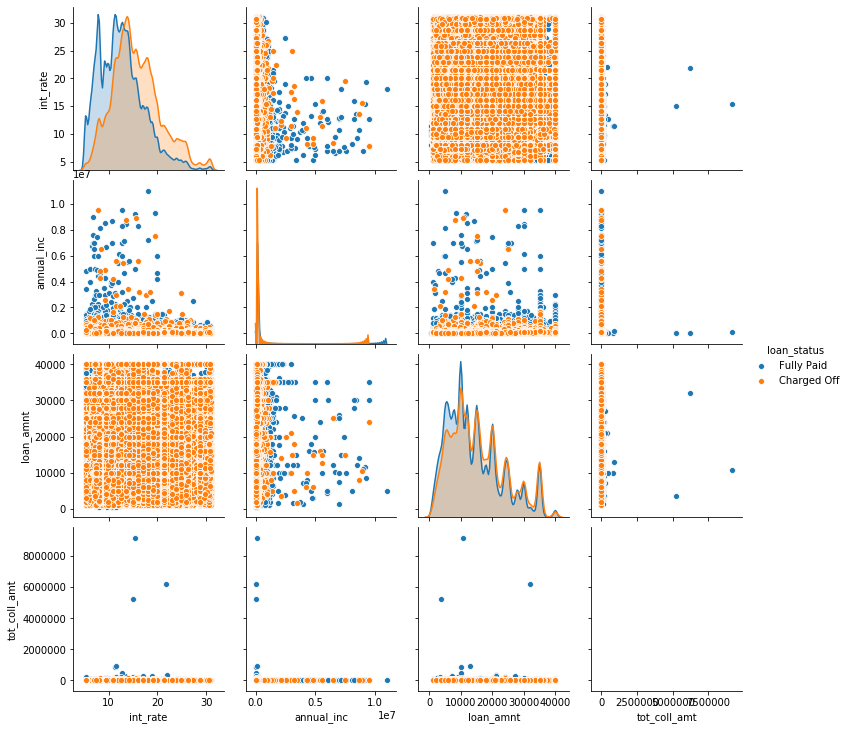

In [22]:
# where're using seaborn here because it can deal better with the categorical value for hue
# we could have also converted the loan status to an int or a color and used pandas
import seaborn as sns # the traditional import of seaborn, better not ask why
# passing the full dataframe to pairplot, determining the color by passing 'hue'
# we also specify the diagonal to be a histogram, not a density estimate,
# which is faster on large datasets.
sns.pairplot(loan_features, hue='loan_status', diag_kind='hist')

Looking at the plot, it might look like most of the samples are 'Charged off', though we know the opposite is the case based on the value counts we computed above.
What we see here is a typical case of overplotting, where much of the data is hidden behind other points. Overplotting is a very common problem
in plotting large datasets such as this. There are some workarounds, like changing the size of the scatter points, changing their transparency 'alpha', or subsampling the data.
We combine them below for a somewhat more informative plot. However, the amount of overplotting might suggest that another plot type, like a hexbin or a splatterplot might have been more appropriate. TODO

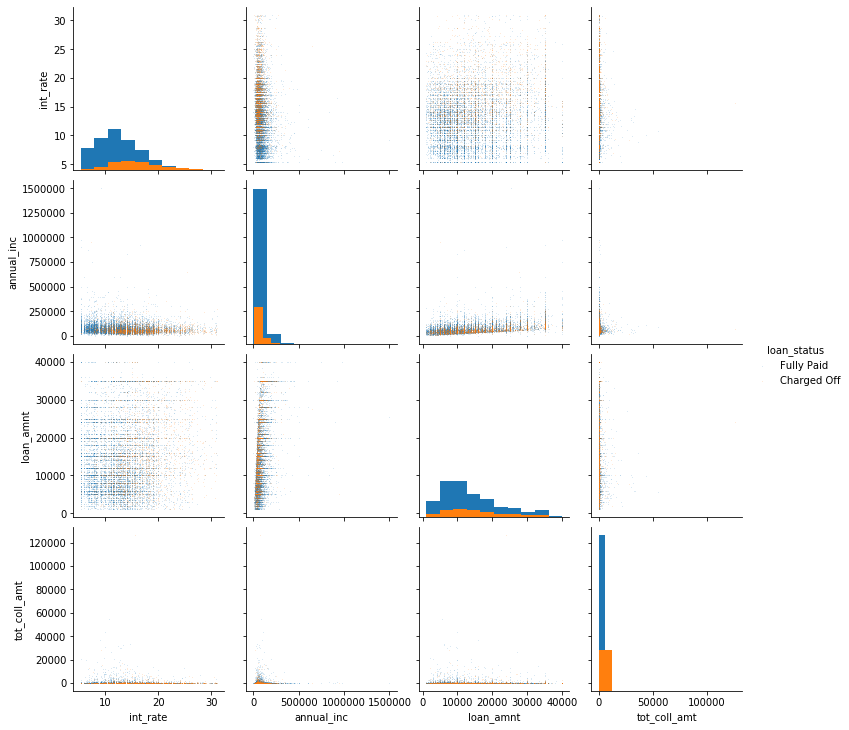

In [42]:
# taking every 100s sample, i.e. subsampling by a factor of 100.
# This is a quick and simple way, but might be dangerous if there's a pattern to the order in the data.
loan_features_sub = loan_features[::100]
sns.pairplot(loan_features_sub, hue='loan_status', diag_kind='hist',
             # s sets marker size, alpha sets transparency,
             # linewidth=0 removes the white boundary of points.
             plot_kws={'alpha':.2, 's':1, 'linewidth':0})

Even after changing the parameters, there's still a large amount of overplotting. You can confirm that by changing the 'hue_order' in seaborn, which would have blue plotted on top of orange, hiding the smaller class.
TODO legend in plot above.
These plots are therefore still somewhat hard to read. There seems to be a relationship between anual income and loan amount. Again, trying logarithmic scaling might help.
We can also see that the loan amount and the interest rate have a distinctive striped pattern. This is likely caused by people preferring round amounts, i.e. people are more likely to ask for a loan of $300,000 than for a loan of $293,912.
Whether there is any interaction between the features with respect to the outcome of the loan seems unclear from the plot.

### Conclusion
This concludes the data loading and exploratory analysis. We've seen some simple ways to explore the data, and we've also seen how 'clean' data can differ from more realistic real-world data. The breast cancer dataset had a small number of samples, all numeric, and we could easily insped the features visually. From a first exploration, the two classes of interest seem easy to separate. Those cases exist in the wild, but most time you won't be as lucky.
The lending club data comes with many features, which have complex causal dependencies. There is no pre-defined goal, and the data has various types, including strings and dates, as well as many missing entries. We need to be careful in selecting rows and column that are informative for our task without allowing our model to cheat by incorporating unobservable information.
